<a href="https://colab.research.google.com/github/dietadestina/PA_EVCast/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [378]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [379]:
df = pd.read_csv('https://raw.githubusercontent.com/dietadestina/PA_EVCast/refs/heads/main/ev_cat.csv')
df

,Date,Value
0,2001-01-01,92
1,2002-01-01,298
2,2003-01-01,82
3,2004-01-01,60
4,2005-01-01,64
...,...,...
278,2019-12-01,17033
279,2020-12-01,15854
280,2021-12-01,53755
281,2022-12-01,105006


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    283 non-null    object
 1   Value   283 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.5+ KB


In [381]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    283 non-null    datetime64[ns]
 1   Value   283 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.5 KB


In [382]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df = df[df.index.year >= 2015]
df

,Value
Date,
2015-01-01,176
2015-02-01,183
2015-03-01,222
2015-04-01,171
2015-05-01,193
...,...
2024-04-01,113345
2024-05-01,123868
2024-06-01,109302


<Axes: xlabel='Date'>

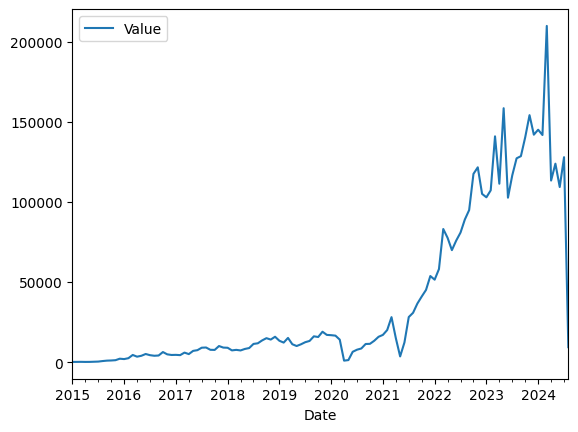

In [383]:
df.plot()

In [384]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(0,1))
df['Value'] = mm.fit_transform(np.array(df['Value']).reshape(-1,1))
df

<ipython-input-384-644743b8d24e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Value'] = mm.fit_transform(np.array(df['Value']).reshape(-1,1))


,Value
Date,
2015-01-01,0.000024
2015-02-01,0.000057
2015-03-01,0.000243
2015-04-01,0.000000
2015-05-01,0.000105
...,...
2024-04-01,0.539844
2024-05-01,0.590039
2024-06-01,0.520559


<Axes: xlabel='Date'>

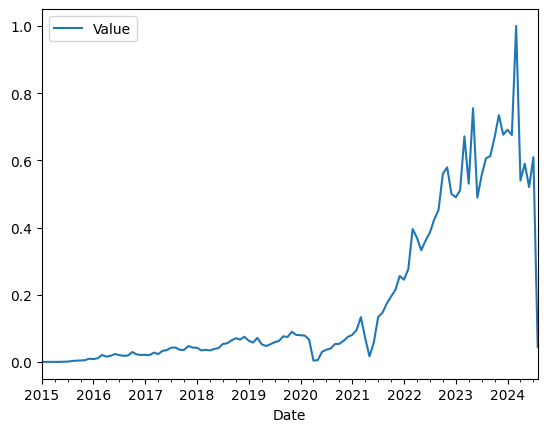

In [385]:
df.plot()

In [386]:
training_size = int(len(df) * 0.65)
train_data, test_data = df.iloc[0:training_size, :], df.iloc[training_size:, :]

len(train_data), len(test_data)

(75, 41)

In [387]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset.iloc[i:(i + time_step), 0].values  # Mengambil sequence sepanjang time_step
        dataX.append(a)
        dataY.append(dataset.iloc[i + time_step, 0])  # Target adalah nilai setelah time_step
    return np.array(dataX), np.array(dataY)

In [388]:
time_step = 1
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [389]:
print(X_train.shape), print(y_train.shape)

(74, 1)
(74,)


(None, None)

In [390]:
print(X_test.shape), print(y_test.shape)

(40, 1)
(40,)


(None, None)

In [391]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [392]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True,))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [393]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_36 (LSTM)                       │ (None, 1, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_37 (LSTM)                       │ (None, 1, 50)               │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_38 (LSTM)                       │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [394]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 524ms/step - loss: 0.0024 - val_loss: 0.2462
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0019 - val_loss: 0.2400
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0014 - val_loss: 0.2338
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0012 - val_loss: 0.2277
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 9.0972e-04 - val_loss: 0.2219
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.1594e-04 - val_loss: 0.2167
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.9089e-04 - val_loss: 0.2125
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.9548e-04 - val_loss: 0.2102
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 8.5577e-04 - val_loss: 0.2097
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.2918e-04 - val_loss: 0.2101
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 8.3789e-04 - val_loss: 0.2112
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms

In [395]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [396]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.011417615657079367

In [397]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.14050256184537147

In [398]:
train_predict = mm.inverse_transform(train_predict)
test_predict = mm.inverse_transform(test_predict)

In [399]:
math.sqrt(mean_squared_error(y_train,train_predict))

9942.939089950363

In [400]:
math.sqrt(mean_squared_error(y_test,test_predict))

104078.83110347262

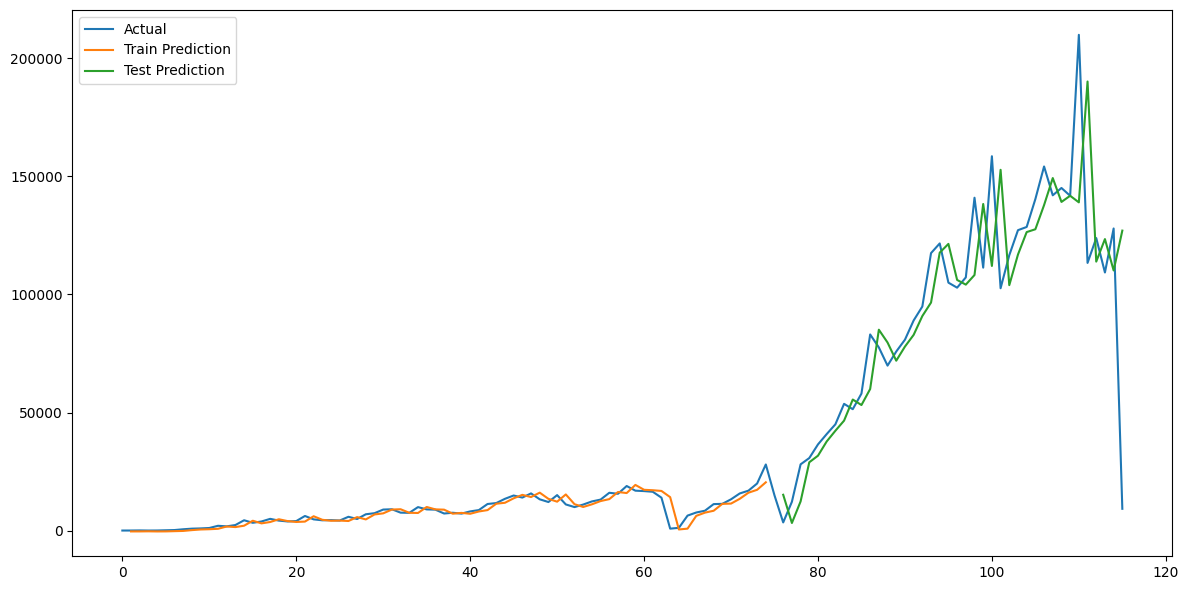

In [401]:
look_back = 1

trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2):len(train_predict) + (look_back * 2) + len(test_predict), :] = test_predict

plt.figure(figsize=(12, 6))
plt.plot(mm.inverse_transform(df['Value'].values.reshape(-1, 1)), label='Actual')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

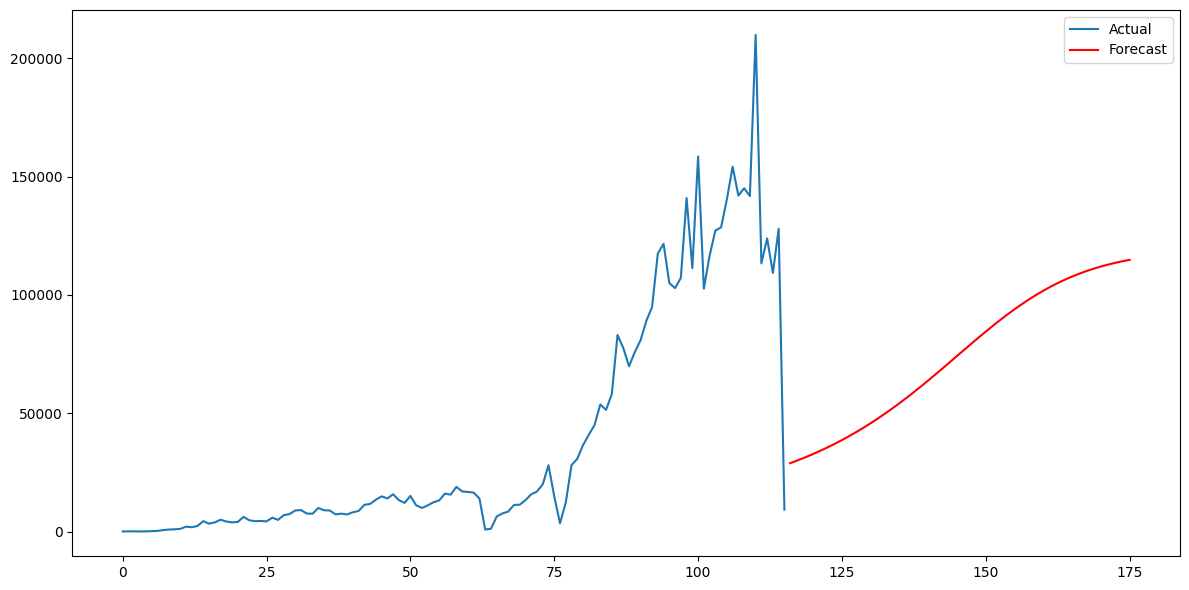

In [405]:
def forecast(model, last_sequence, n_steps, time_step):
    predictions = []
    current_input = last_sequence.reshape(1, time_step, 1)

    for _ in range(n_steps):
        predicted_value = model.predict(current_input)
        predictions.append(predicted_value[0, 0])
        current_input = np.append(current_input[:, 1:, :], predicted_value.reshape(1, 1, 1), axis=1)

    return predictions

last_sequence = train_data['Value'].values[-time_step:]
n_steps = 60
forecasted_values = forecast(model, last_sequence, n_steps, time_step)
forecasted_values = mm.inverse_transform(np.array(forecasted_values).reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(mm.inverse_transform(df['Value'].values.reshape(-1, 1)), label='Actual')
plt.plot(np.arange(len(df), len(df) + n_steps), forecasted_values, label='Forecast', color='red')
plt.legend()
plt.tight_layout()
plt.show()